### Escula Politécnica Nacional
![](https://servicios-it.epn.edu.ec/images/dgip/logo-2.png)
### Facultad de Ingeniería de Sistemas
![](https://fis.epn.edu.ec/images/FISlogo.jpg)
### Python - GR1

# Además de Jack y Rose...
## 1. Introducción
La tragedia ocurrida la noche del 14 y la madrugada del 15 de abril de 1912 conmocionó al mundo entero. El naufragio del RMS Titanic, que salía de Southampton hacia Nueva York, es un acontecimiento tan famoso que inclusive tiene una pelicula inspirada en él. Sin embargo, muy pocos tienen idea de la cantidad de afectados por este acontecimiento. El objetivo del presente trabajo es mostrar, de una manera gráfica, qué sucedio con la gran cantidad de personas a bordo del Titanic

Usando un dataset con una muestra de datos reales que indican la magnitud de lo sucedido y con ayuda de herramientas de visualización de datos del lenguaje de programación Python, se pretende mostrar lo sucedido en este acontecimiento. La muestra del dataset es de 891 filas con 10 datos cada una. Estos datos nos permiten conocer de mejor maner lo acontecido en la tragedia, en terminos de quién logró sobrevivir y quién no. Las columnas del dataset se explican a continuación.

## 2. Descripción del Dataset
|  Variable |              Definición              | Descripción                                              |
|:---------:|:------------------------------------:|----------------------------------------------------------|
| Passenger | Identificador de pasajero            | Entero                                                   |
|  Survived |             Supervivencia            | Entero. 0 = No, 1 = Sí                                   |
|   Pclass  |           Clase del Ticket           | Entero. 1 = Primera, 2 = Segunda, 3 = Tercera            |
| Name      | Nombre del pasajero                  | Cadena de caracteres                                     |
| Sex       | Sexo                                 | Cadena de caracteres. male = Hombre, female = Mujer      |
| Age       | Edad en años                         | Entero                                                   |
| Sibps     | Número de hermanos y esposas a bordo | Entero                                                   |
| Parch     | Número de padres e hijos a bordo     | Entero                                                   |
|   Ticket  |           Número de ticket           | Cadena de caracteres                                     |
| Fare      | Tarifa de pasajero                   | Decimal                                                  |
| Cabin     | Número de cabina                     | Cadena de caracteres                                     |
| Embarked  | Puerto del cual embarcó           | Caracter. C = Cherbourg, Q = Queenstown, S = Southampton |

## 3. Gráficos
### 3.1 Datos Generales
#### Cantidad y porcentaje de personas por sexo
Es importante concer el sexo de las personas que estuvieron a bordo para tener una idea inicial de las personas en el barco.


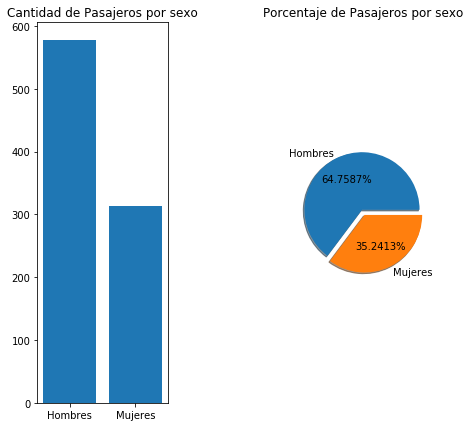

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path = "C://Users//Andres//Desktop//PYTHON//titanic.csv"
columnas = ['Survived','Sex'];
# Pie chart de hombres y mujeres
df = pd.read_csv(path, usecols = columnas);
total = len(df)
numero_por_sexo = df['Sex'].value_counts();

promedios_por_sexo = numero_por_sexo.apply(lambda x: 100 * x / float(total))

labels = ['Hombres','Mujeres'];

fig1, (ax1, ax2) = plt.subplots(1,2, figsize = (7,7))
ax2.pie(
    promedios_por_sexo, 
    labels = labels, 
    explode = (0.1 , 0), 
    autopct = '%1.4f%%', 
    shadow = True, 
    startangle = 0)
ax2.axis('equal')
ax2.title.set_text('Porcentaje de Pasajeros por sexo')
ax1.bar(
    ['Hombres', 'Mujeres'], 
    numero_por_sexo,

       )
ax1.title.set_text('Cantidad de Pasajeros por sexo')
fig1.subplots_adjust(wspace=1)
plt.show()



#### Tarifa de pasajero por edad
Permite conocer como se realizaron los pagos de las tarifas y si es que hay algún descuento a personas según la edad.

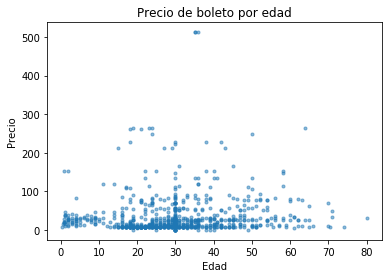

In [72]:
columnas = ['Fare', 'Age']
fare_age = pd.read_csv(path, usecols = columnas)
fare_age = fare_age.fillna(round(fare_age['Age'].mean()))
colors = (0,0,0)
area = np.pi*3

plt.scatter(fare_age['Age'], fare_age['Fare'], s=area, alpha=0.5)
plt.title('Precio de boleto por edad')
plt.xlabel('Edad')
plt.ylabel('Precio')
plt.show()


#### Cantidad de pasajeros por puerto

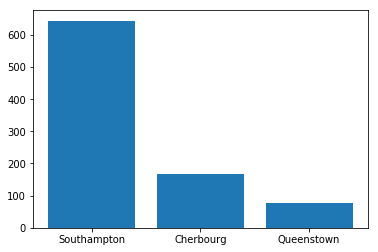

In [69]:

columnas = ['Embarked']
embarked = pd.read_csv(path, usecols = columnas)
cantidad_por_puesto = embarked['Embarked'].value_counts()
fig, ax = plt.subplots()
ax.bar(
       ['Southampton', 'Cherbourg', 'Queenstown'],
       cantidad_por_puesto)
plt.show()

#### Edad por sexo

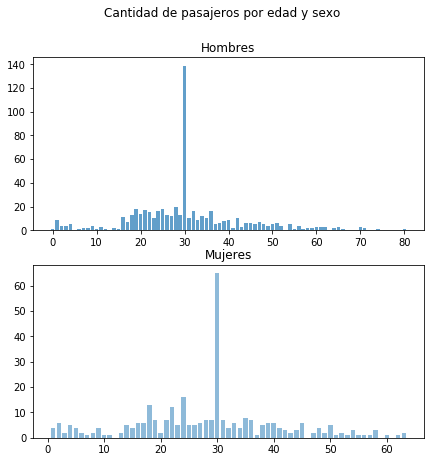

In [77]:
columnas = ['Age','Sex'];
df2 = pd.read_csv(path, usecols = columnas);
df2 = df2.round()
media = df2['Age'].mean()
media = round(media)
df2 = df2.fillna(media)

df_mujeres = df2[df2['Sex'] == 'female']
edades_mujeres = df_mujeres['Age'].value_counts()
df_hombres = df2[df2['Sex'] == 'male']
edades_hombres = df_hombres['Age'].value_counts()

fig, (ax1, ax2) = plt.subplots(2, figsize=(7,7))
fig.suptitle('Cantidad de pasajeros por edad y sexo')
ax1.bar(
    edades_hombres.index, 
    edades_hombres, 
    align='center', 
    alpha=0.7)
ax1.set(
title = 'Hombres')
ax2.bar(
    edades_mujeres.index, 
    edades_mujeres, 
    align='center', 
    alpha=0.5)
ax2.set(
title = 'Mujeres')
fig.subplots_adjust(hspace=0.2)
plt.show()

### 3.2 Datos de supervivencia
#### Porcentaje de sobrevivientes por sexo, subpiechart 




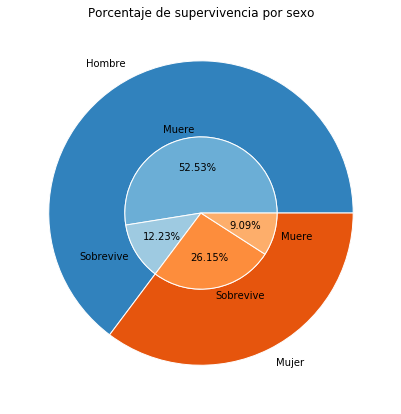

In [38]:

columnas = ['Survived','Sex'];
df1 = pd.read_csv(path, usecols = columnas);
numero_por_sexo = df['Sex'].value_counts();

promedios_por_sexo = numero_por_sexo.apply(lambda x: 100 * x / float(len(df1)))

df_mujeres = df1[df1['Sex'] == 'female']
supervivencia_mujeres = df_mujeres['Survived'].value_counts().apply(lambda x: 100 *x / float(len(df1)))
df_hombres = df1[df1['Sex'] == 'male']
supervivencia_hombres = df_hombres['Survived'].value_counts().apply(lambda x: 100 * x / float(len(df1)));

values = np.array([supervivencia_hombres.array, supervivencia_mujeres.array])

fig, ax = plt.subplots(figsize = (7,7))

size = 0.5
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.pie(
    promedios_por_sexo, 
    labels = ['Hombre', 'Mujer'], 
    radius=1, 
    colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(
    values.flatten(),
    radius=1-size,
    colors=inner_colors,
    labels = ['Muere', 'Sobrevive','Sobrevive', 'Muere'], 
    autopct = '%1.2f%%',   
    wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Porcentaje de supervivencia por sexo')
plt.show()

####  Sobrevivientes por edad.

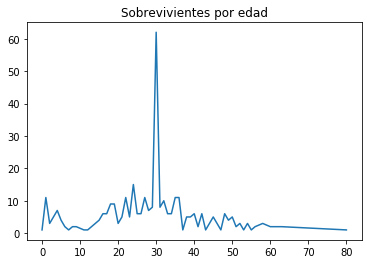

In [79]:

columnas = ['Age','Survived'];
df3 = pd.read_csv(path, usecols = columnas);
df3 = df3.round()
df3 = df3.fillna(round(df3['Age'].mean()))
sobrevivientes_edad = df3[df3['Survived'] == 1]['Age'].value_counts()
sobrevivientes_edad = sobrevivientes_edad.sort_index()
fig, ax = plt.subplots()
ax.plot(
    sobrevivientes_edad.index,
    sobrevivientes_edad,
    ) 
ax.set(title = 'Sobrevivientes por edad')
plt.show()



####  Cantidad y Porcentaje de sobrevientes por Tipo de Ticket.



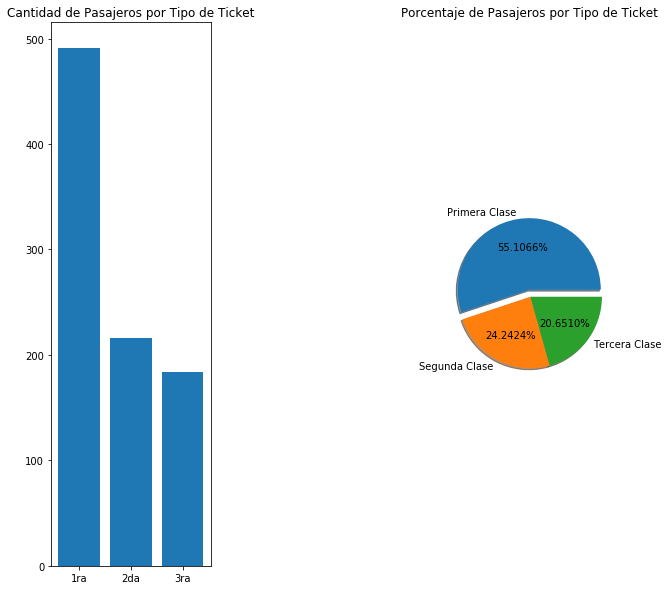

In [80]:
columnas = ['Survived','Pclass']
df = pd.read_csv(path, usecols = columnas);
numero_por_clase = df['Pclass'].value_counts();

promedios_por_clase = numero_por_clase.apply(lambda x: 100 * x / float(len(df)))

labels = ['Primera Clase','Segunda Clase', 'Tercera Clase'];

fig1, (ax1, ax2) = plt.subplots(1,2, figsize = (10,10))
ax2.pie(
    promedios_por_clase, 
    labels = labels, 
    explode = (0.1 , 0., 0.), 
    autopct = '%1.4f%%', 
    shadow = True, 
    startangle = 0)
ax2.axis('equal')
ax2.title.set_text('Porcentaje de Pasajeros por Tipo de Ticket')
ax1.bar(
    ['1ra', '2da', '3ra'], 
    numero_por_clase,

       )
ax1.title.set_text('Cantidad de Pasajeros por Tipo de Ticket')
fig1.subplots_adjust(wspace=1.5)
plt.show()